# Midterm #2

**Read the following.** It contains important information about this exam.
 - You must submit your solutions to Canvas **by 4:00 pm!** Please plan accordingly. This gives you approximately 1.5 hours for this exam.
 - There is both a written and computational part to this exam. You will need to download both from Canvas, and submit solutions for both to Canvas.
 - You are allowed to use any reference materials you like for this exam, except each other.
 - You should make an effort to answer all questions on this exam. Clearly identify your final answers, and clearly explain your solutions. This will be graded according to the syllabus rubric, so effort will be heavily weighted.


## Initialization

Collect all your initialization here.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integ
import scipy.special as spec

## Potential of a Line Charge

In introductory physics we learn that the electric potential a distance $z$ above a line of charge with linear charge density $\lambda(x)$ is given by

$$ \Phi (z) = \frac{1}{4\pi\epsilon_0} \int_{-\infty}^{\infty} \mathrm{d}x \frac{\lambda(x)}{\sqrt{x^2+z^2}}. $$

In this problem we will consider a linear charge density

$$ \lambda(x) = \frac{q}{a} \mathrm{e}^{-x^2/a^2} , $$

where we choose $q/(4\pi\epsilon_0) = 1\mathrm{V\cdot m}$ and $a = 1.89\,\mathrm{m}$.

Produce a figure of $\Phi(z)$ for $z\in[0.1,5]\,\mathrm{m}$.

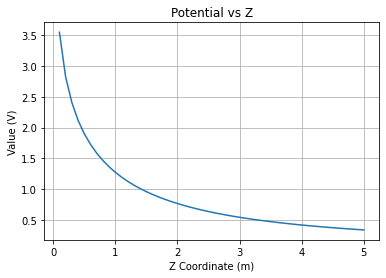

In [2]:
def chargeDensity(q,a,x):
    chargeDensityVal=q/a*np.exp(-1*x**2/(a**2))
    return chargeDensityVal
def integrand(q,a,x,z):
    integr = chargeDensity(q,a,x)/(np.sqrt(x**2+z**2))
    return integr
# Moving the 1/4pie0 into q. So the units will be wonky but whatever it wont be that hard to reverse it for coulombs if it matters
q=1
a=1.89
z=np.linspace(0.1,5)
results = np.zeros_like(z)
i =0
for value in z:
    intLambda = lambda x : integrand(q,a,x,value)
    integral = integ.quad(intLambda,-np.inf,np.inf)
    results[i]=integral[0]
    i = i+1
plt.plot(z,results)
plt.xlabel("Z Coordinate (m)")
plt.ylabel("Value (V)")
plt.title("Potential vs Z")
plt.grid()

It turns out that this integral can be performed analytically, the result being

$$ \Phi(z) = \left( \frac{q}{4\pi\epsilon_0 a} \right) \mathrm{e}^{y^2} K_0(y^2), $$

where $y\equiv z/(\sqrt{2}a)$ and $K_0(x)$ is yet another special function known as the zeroth order modified Bessel of the second kind. Not surprisingly, this function is defined in scipy.special with an obvious name.

Calculate and plot the fractional error in the integral you calculated above.

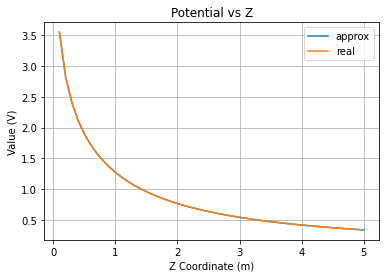

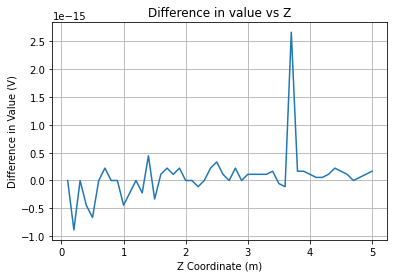

In [3]:
def realValue(q,a,z):
    y=z/(np.sqrt(2)*a)
    phiReal = q/a*np.exp(y**2)*spec.kn(0,y**2)
    return phiReal
results2 = np.zeros_like(z)
i=0
for value in z:
    results2[i]=realValue(q,a,value)
    i = i+1
plt.plot(z,results, label="approx")
plt.plot(z,results2, label="real")
plt.xlabel("Z Coordinate (m)")
plt.ylabel("Value (V)")
plt.title("Potential vs Z")
plt.legend()
plt.grid()
plt.show()
dif = results -results2
plt.plot(z,dif, label="Difference")
plt.xlabel("Z Coordinate (m)")
plt.ylabel("Difference in Value (V)")
plt.title("Difference in value vs Z")
plt.grid()
plt.show()

## Lane-Emden Equation

**Note:** you should complete the written problem 1 before working on this problem.

The Lane-Emden equation describes a self-gravitating, spherically symmetric, polytropic fluid.  It is often used as a (rather) simple model of a star.  A polytropic fluid is one that satisfies the polytropic equation of state, $P \propto \rho^{1+1/n}$, where $P$ is the pressure, $\rho$ is the density, and $n$ is called the polytropic index.  Written in dimensionless form the Lane-Emden equation becomes the second order differential equation:

$$ \frac1{\xi^2} \frac{\mathrm{d}}{\mathrm{d}\xi} \left( \xi^2 \frac{\mathrm{d}}{\mathrm{d}\xi} \theta(\xi) \right) + \theta(\xi)^n = 0. $$

Here $\xi$ is a dimensionless radius and the function $\theta(\xi)$ is related to the density (and so is also related to the pressure) in the fluid.  You can see <a href="http://en.wikipedia.org/wiki/Lane%E2%80%93Emden_equation">Wikipedia</a> for a brief discussion and derivation.  For our purposes, this is just a differential equation we can solve numerically.

Solve the Lane-Emden equation for $n=0$ and $n=2$ using `solv_ivp` and the initial conditions $\theta(0)=1$ and $\frac{\mathrm{d}\theta}{\mathrm{d}\xi}(0)=0$.
Note that this system of equations has a coordinate singularity at $\xi =0$. There are several ways we can work around this. Here, we can just begin integrating at a small, non-zero value of $\xi$, e.g. $\xi = 10^{-8}$.
Integrate to a large enough $\xi$ so that $\theta$ becomes negative.

*Hint: For the $n=0$ polytrope, solve_ivp may take a very large step, and the resulting solution will not be sampled well enough to produce a nice figure. To improve this, you can specify a maximum step size, e.g. specify `max_step = 0.01` when using `solve_ivp`.*

Out of time, but what I would do is take my written system of equation and put them as a function. Then Id plug this into solve ivp for the solution.
Below is the start of this. Basically I need to define the starting stuff and the initial conditions and step size etc

In [4]:
# YOUR CODE HERE
def ode(t, y):
    """Define the 3rd order ODE we want to solve"""
    y0 = y[0]
    y1 = y[1]
    
    f0 = y1
    f1 = -2*y1/t-1
    
    return np.array([f0, f1], float)
    
y0 = [0.2, 0, 0.1]
traj = integ.solve_ivp(ode, (0,16), y0, vectorized=True, rtol=1.0e-10, atol=1.0e-10)

<ipython-input-4-08b7ac3c8f91>:8: RuntimeWarning: invalid value encountered in true_divide
  f1 = -2*y1/t-1


ValueError: operands could not be broadcast together with shapes (2,) (3,) 

**Note:** you should complete the written problem 1 before working on this problem.

In problem 1 of the written portion, you should have determined an analytic solution for the $n=0$ polytrope. Plot the fractional error in the numerical solution obtained from `solve_ivp`.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

## Turn in the Exam

Turn in the exam on Canvas following the procedure used for the labs and homework.